# Maximum Expected Coverage Location Problem（MEXCLP）

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Maximum-Expected-Coverage-Location-Problem（MEXCLP）" data-toc-modified-id="Maximum-Expected-Coverage-Location-Problem（MEXCLP）-1">Maximum Expected Coverage Location Problem（MEXCLP）</a></span><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1.1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#MEXCLP" data-toc-modified-id="MEXCLP-1.1.1">MEXCLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-1.2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-1.3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-1.3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-1.3.2">Road Network Data</a></span></li></ul></li></ul></li></ul></div>

## Problem Description

### MEXCLP

Daskin developed the MEXCLP based on the MCLP formula, which assumes that each contingency facility has the same probability of being busy. The MEXCLP is an integer linear programming model that allows for the assignment of more than one contingency facility at each demand point. The MEXCLP is developed by placing k contingency facilities at a demand point, with the aim of **maximizing expected demand.**

*Parameters*:
* **$d_{i}$** : demand on point $i$
* **$N_{i}$** : Set of facilities that could cover demand point $i$
* **$p$** : Number of facilities
* **$q_{k}$** : Reliability of coverage given $k$ facilities

*Decision variables*:
$$
\begin{array}{lll}
X_{j}= \begin{cases}1, & \text { if facility } j { is chosen} \\ 0, & \text { else }\end{cases}\\
Y_{jk}= \begin{cases}1, & \text { demand point } i { is covered by } k {facilities} \\ 0, & \text { else }\end{cases}
\end{array}
$$

###  Integer programming model:

$$
\begin{array}{lll}
\text{Max} & \sum_{i=1}^{n} \sum_{k=1}^{p} {d_i q_{k} Y_{ik}} & (1) \\
\text{s.t.} & \sum_{j\in N_i}^{} X_j - \sum_{k=1}^{p}kY_{ik} \le 0,i=1,...,n, & (2)\\
& \sum_{j=1}^{m}X_{j} \;\le\; p ,j=1,...,m, & (3)\\
\end{array}
$$


The objective function equation (1) describes the number of demands at node $i$ that can be covered by $k$ emergency facilities within the corresponding response time/distance. This objective function aims to maximize the sum of the demand and coverage reliability of the nodes. The system constraints are shown from (2) to (5). Equation (3) limits the number of emergency facilities that can be allocated at $j$ to a maximum of p. Also, (4) and (5) show $X_j$ and $Y_j$, with k set to 0 or 1, which indicate the decision variables. 




## Setup

In [1]:
import random
from itertools import product
import numpy as np
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from location.CModel import *

## Example

### Random Data

In [2]:
np.random.seed(0) # random seed

solver_list = listSolvers(onlyAvailable=True)
print(solver_list)

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


In [3]:
n_points = 20
prob = 0.2
p = 4
radius = 0.2
num_people = np.random.randint(1, 10, size=n_points)
points = [(random.random(), random.random()) for i in range(n_points)]
points_np = np.array(points)
A = np.sum((points_np[:, np.newaxis, :] - points_np[np.newaxis, :, :]) ** 2, axis=-1) ** 0.5
mask = A <= radius
A[mask] = 1
A[~mask] = 0

In [4]:
selected, served, obj = MaximumExpectedCoverageLocation(demand=num_people,
                                                        unprob_rate=prob,
                                                        num_located=p,
                                                        num_points=n_points,
                                                        cover=A,
                                                        solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected position =  [0, 11, 17, 7]
Objective function value =  73.6
Unreliability rate =  0.2


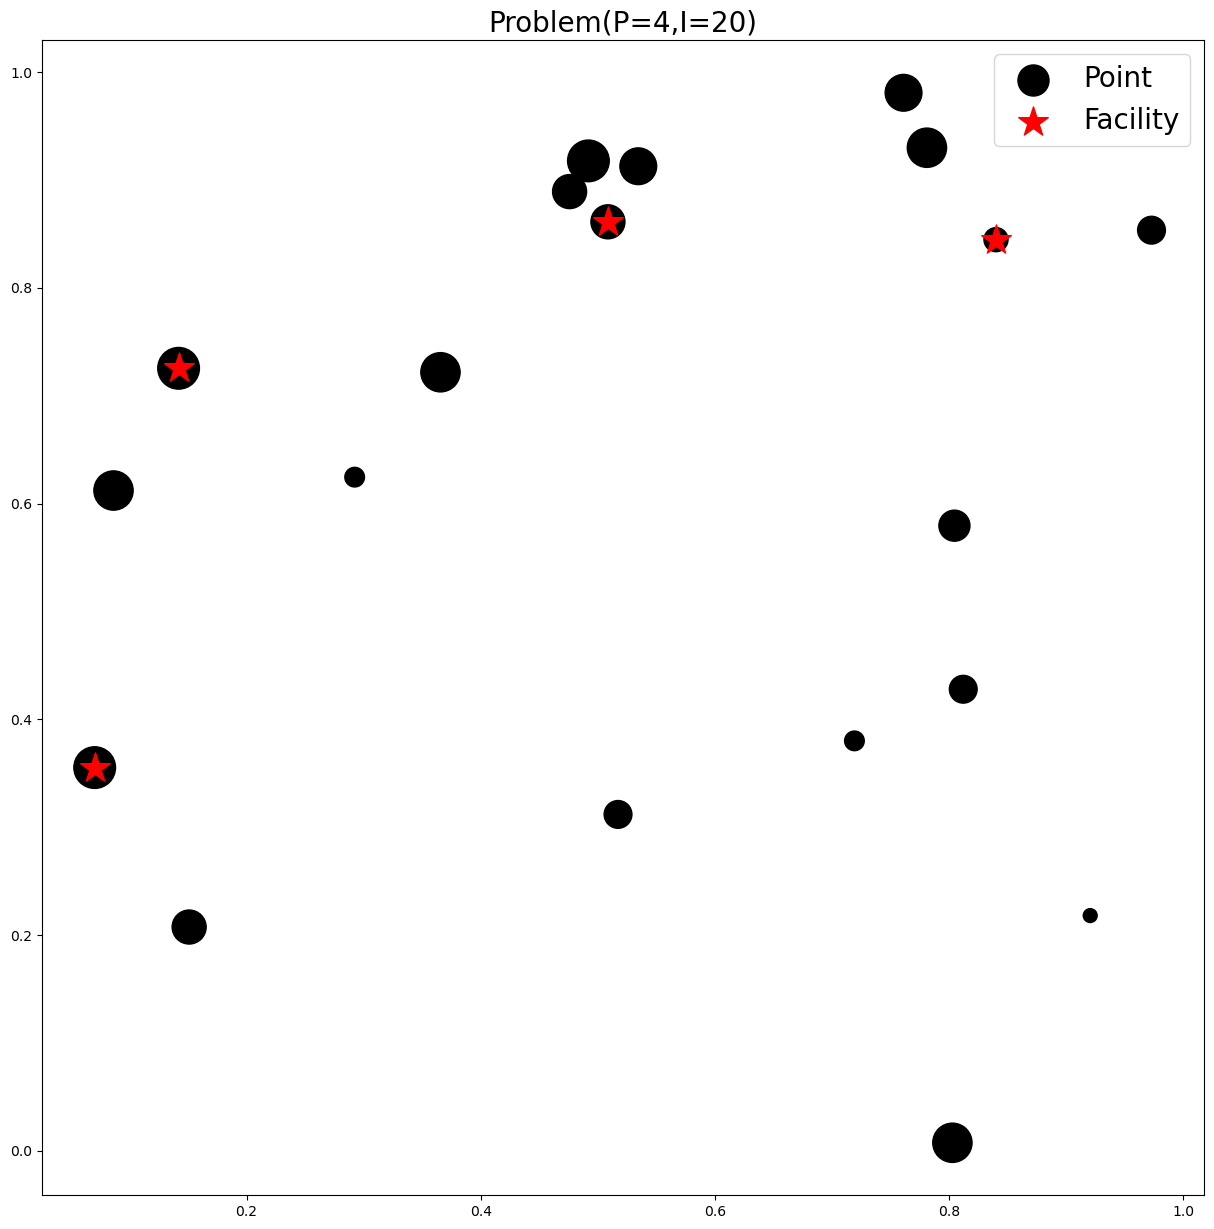

In [5]:
#Image representation
plt.figure(figsize=(15,15))
name = 'Problem(P=' + str(p) + ',I=' + str(n_points) + ')'
plt.title(name, fontsize = 20)
#Points
# points_np.plot(color='red', markersize=num_people*2, label="Point")
plt.scatter(points_np[:, 0], points_np[:, 1], c='black', s=num_people*100, label="Point")
plt.scatter(points_np[selected, 0], points_np[selected, 1], c='red', marker='*', s=500, label="Facility")
# plt.grid(True)
plt.legend(loc='best', fontsize = 20)
plt.show()

### Road Network Data

In [6]:
df = pd.read_csv('..\data\北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 10
prob = 0.2
np.random.seed(0)
num_people = np.random.randint(1,10, size=num_points)
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [7]:
radius = 0.03
points_np = np.array(points)
A = np.sum((points_np[:, np.newaxis, :] - points_np[np.newaxis, :, :]) ** 2, axis = -1) ** 0.5
mask = A <= radius
A[mask] = 1
A[~mask] = 0

In [8]:
selected, served, obj = MaximumExpectedCoverageLocation(demand=num_people,
                                                        unprob_rate=prob,
                                                        num_located=num_located,
                                                        num_points=num_points,
                                                        cover=A,
                                                        solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected position =  [103, 115, 30, 63, 64, 80, 81, 87, 9, 99]
Objective function value =  424.992
Unreliability rate =  0.2


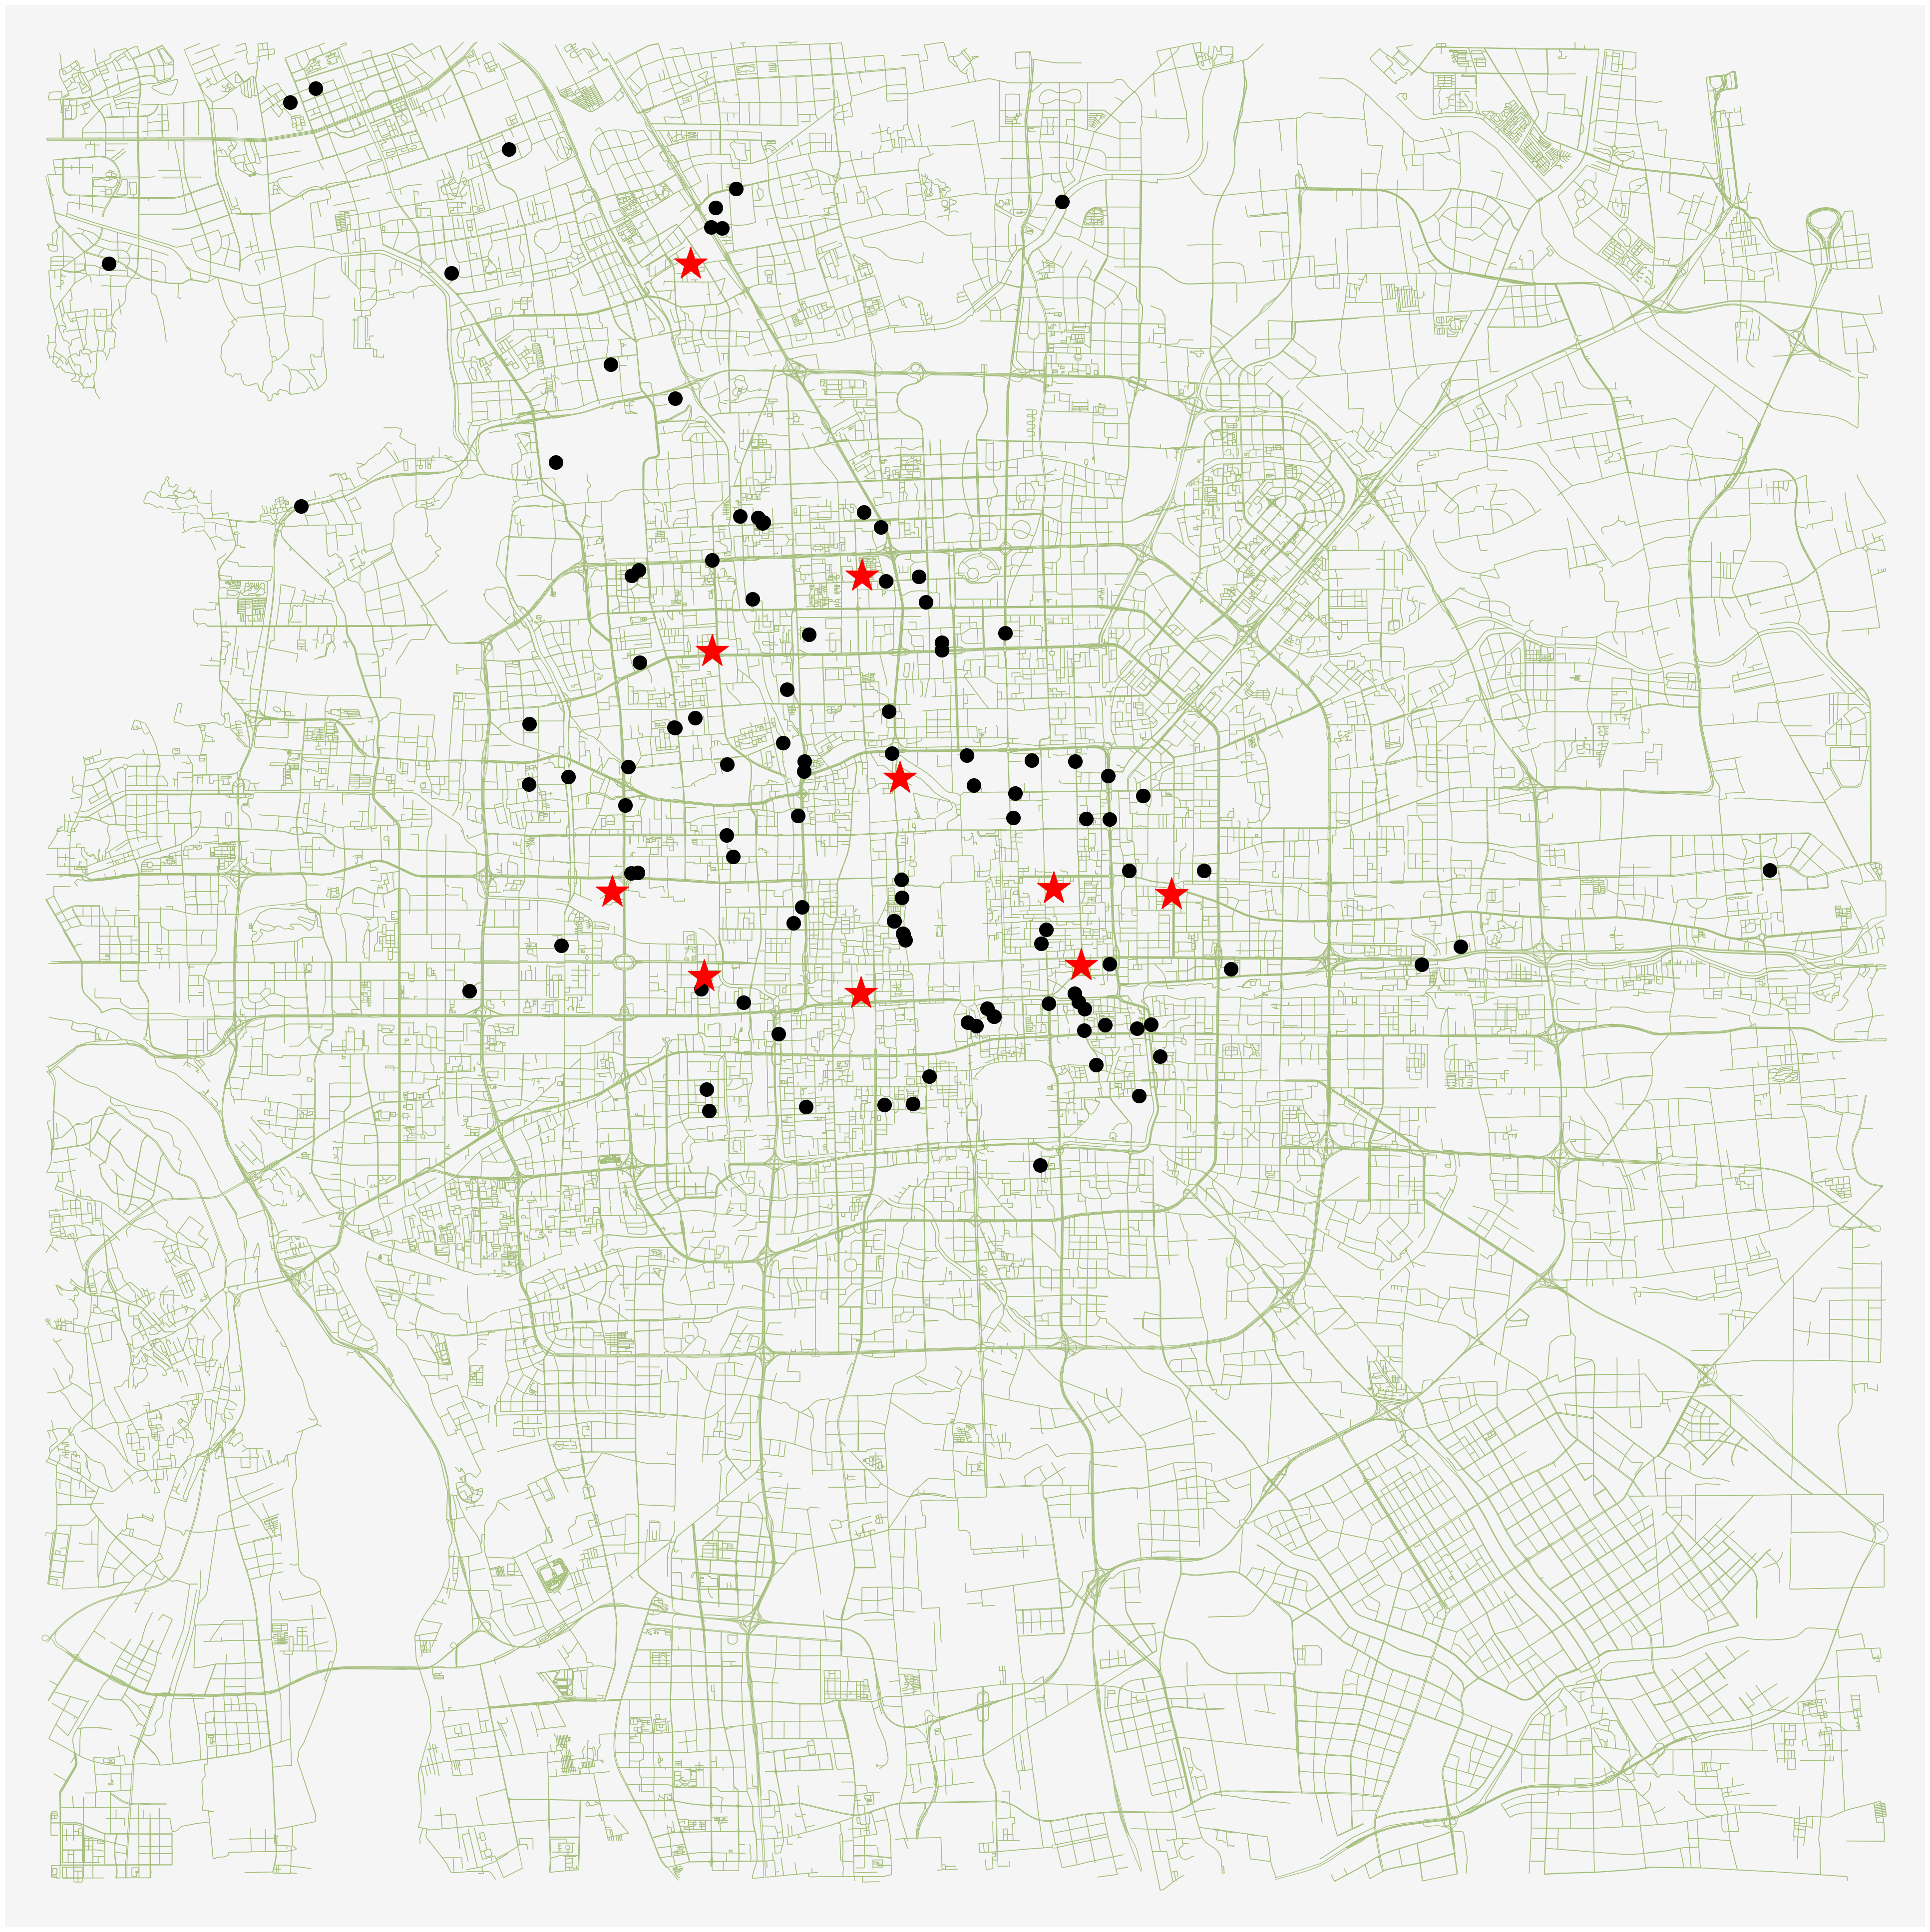

In [9]:
G = ox.load_graphml('..\data\Beijing.graphml')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in selected:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)